In [2]:
from torchvision import models
import torch
from explanable.common.utilize import readImageAndPreprocessing
from explanable.explainmethods.GuidedGramExpl import GuidedGramExplClass
from explanable.visualization import visual
from explanable.metrics.MorfLerf import MorfLerfClass
from explanable.visualization.visual import showChapter
from explanable.visualization.visual import showByPictures
from explanable.metrics.DeletionInsertion import DeletionInsertionClass

%load_ext autoreload
%autoreload 2

PATH_TO_IMAGE = "../image/deer.png"
# PATH_TO_IMAGE = '../image/cat.jpg'
inputs = readImageAndPreprocessing(PATH_TO_IMAGE)
print(inputs.shape)

(1, 3, 224, 224)


In [3]:
model = models.resnet50()
model.load_state_dict(torch.load('../pretrainingmodel/resnet50-0676ba61.pth'))
model.eval()
print()

In [4]:
sm = GuidedGramExplClass(model)
sm.explain(inputs)

C:\Users\Alex\anaconda\Lib\site-packages\torch\nn\modules\module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


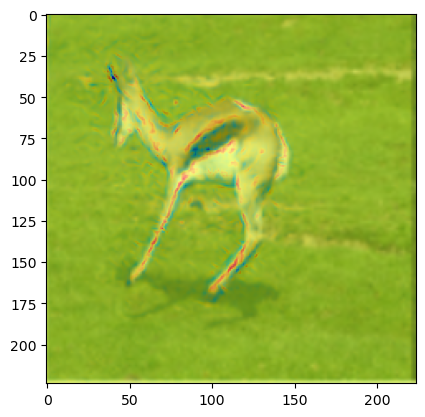

In [5]:
visual.showExplanation(sm.result, PATH_TO_IMAGE)

In [6]:
ml = MorfLerfClass(model)
ml.setExplanation(sm)
probeMorf, probeLerf = ml.evaluate(inputs)


0.19940709376463756
0.4327785571416219


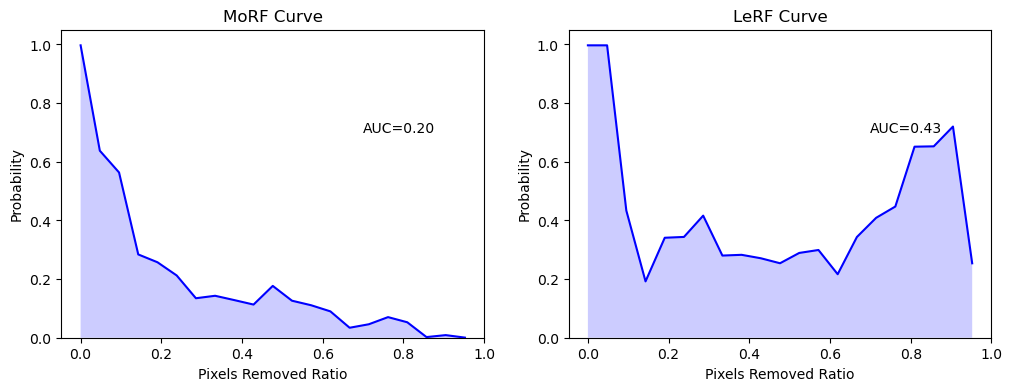

In [7]:
showChapter(probeMorf, probeLerf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

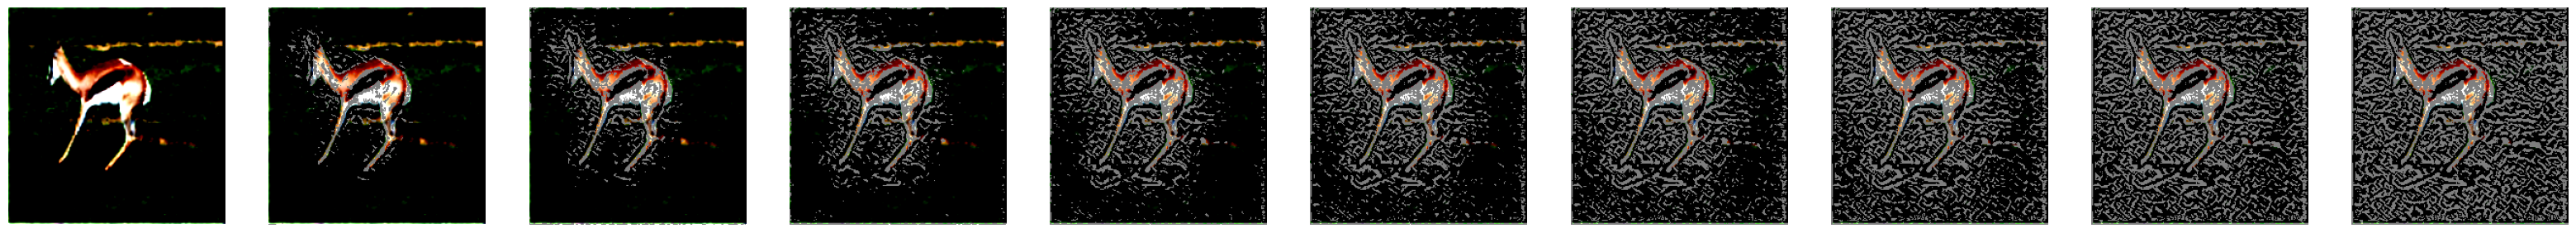

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

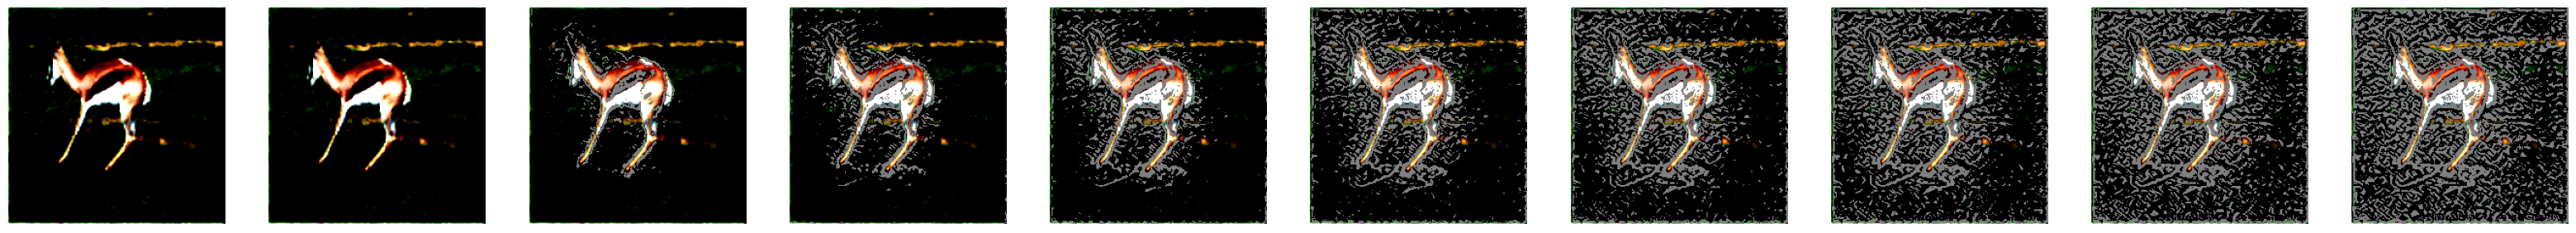

In [8]:
showByPictures(ml.intermediaResults)

0.19940709376463756
0.4330576090585618


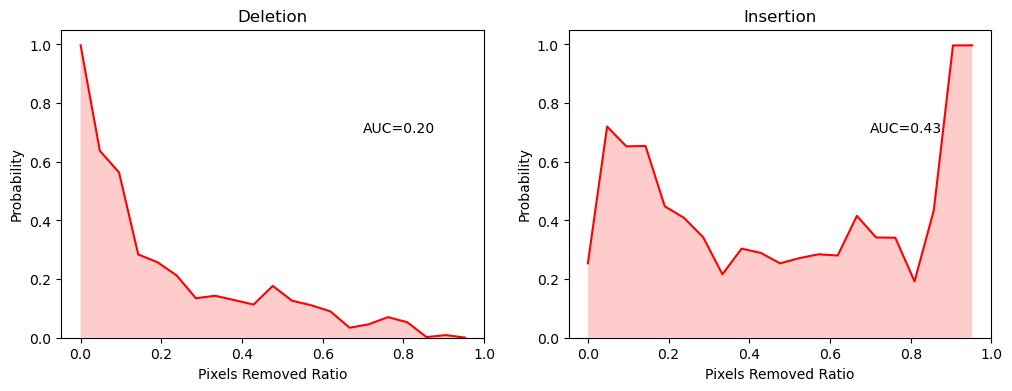

In [9]:
di = DeletionInsertionClass(model)
di.setExplanation(sm)
deletion, insertion = di.evaluate(inputs)
showChapter(deletion, insertion)